# Titanic 

Goal: predict survival on the Titanic  

Here we are looking into how to apply Logistic Regression to the Titanic dataset.

# 1. Collect and understand the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# get titanic training file as a DataFrame
# titanic = pd.read_csv("Data/train.csv")

In [3]:
# df=pd.read_excel(r"path/train.xlsx")

In [4]:
df=pd.read_csv("Data/train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#preprocess the data

#1: check the nan
#Normalization numerical data using the minmaxscaler(0-1)
#Encoding of the categorical data (map/labelencoder)

In [6]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [163]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [164]:
df.shape

(891, 12)

In [165]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
df['Embarked'].mode()[0]

'S'

In [167]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [168]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [169]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

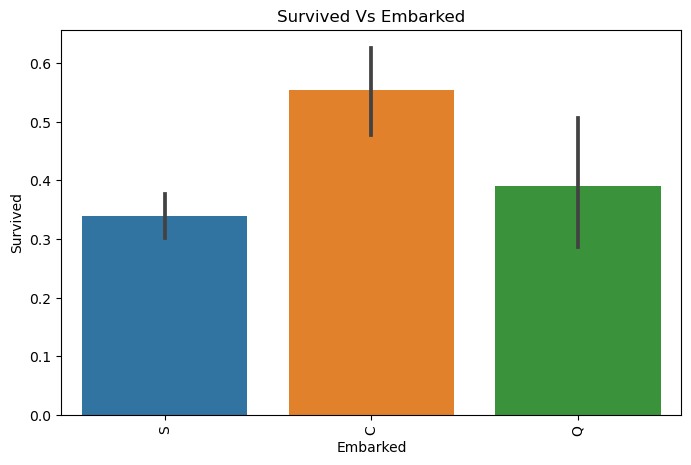

In [170]:
plt.figure(figsize=[8,5])
sns.barplot(data=df, x='Embarked',y='Survived')
 
plt.xticks(rotation=90)
plt.title("Survived Vs Embarked")
plt.show()

In [171]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
'''

Create a plot:
1: Emarbked and Survived
2: PClass and Survived
3: Sex and Survived




'''

'\n\nCreate a plot:\n1: Emarbked and Survived\n2: PClass and Survived\n3: Sex and Survived\n\n\n\n\n'

In [173]:
df.shape

(891, 12)

In [174]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [175]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [176]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [177]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [178]:
titanic=df.copy()

In [179]:
titanic.shape

(891, 12)

In [180]:
# preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
'''
Number of male and female passenger who survived
Number of people survived and not survive based on their emabarkation.
'''

'\nNumber of male and female passenger who survived\nNumber of people survived and not survive based on their emabarkation.\n'

In [182]:
col=['Sex','Survived']
df[col].value_counts()


Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [ ]:
pd.crosstab(df['Survived'],df['Sex'])

In [ ]:
# what is the prob that person is survived given that he is a male.
#109/(468+109)=0.18

#what is the prob that the person is feamle given that she survived. 233/(233+109)=0.68



In [ ]:
#what is the prob that person is survived given that he is a female.

In [ ]:
233/(233+81)

In [ ]:
pd.crosstab(titanic['Survived'],titanic['Pclass'])

In [ ]:
#what is the prob that person is survived given that he  is travelling in first class.
136/(136+80)

In [ ]:
#2
87/(87+97)

In [ ]:
#3
119/(372+119)

In [ ]:
pd.crosstab(titanic['Survived'],titanic['Embarked'])

In [ ]:
#C
93/(93+75)

In [ ]:
#Q
30/77

In [ ]:
#S
217/(217+427)

In [ ]:
# titanic['Survived'==1].groupby('Sex').value_counts()
titanic.groupby('Survived')['Sex'].value_counts()

# titanic[titanic['Survived']==1].groupby('Sex').count()['Sex']

In [ ]:
'''
To remove the nominal  scale of data.
Handle the missing values.
Encode the categorical features
Normalise the Numerical features

Submit Jupyter Notebook file  with these data preprocessing
EDA of titanic dataset

Saturday 5th Aug

'''

In [13]:
df=pd.read_csv('Data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
df.shape

(569, 33)

In [11]:
df.shape

(15000, 10)

In [7]:
titanic=pd.read_csv('Data/train.csv')

In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Description
---
Survived: Survived (1) or died (0);  this is the target variable  
Pclass: Passenger's class (1st, 2nd or 3rd class)    
Name: Passenger's name  
Sex: Passenger's sex  
Age: Passenger's age  
SibSp: Number of siblings/spouses aboard  
Parch: Number of parents/children aboard  
Ticket: Ticket number  
Fare: Fare  
Cabin: Cabin  
Embarked: Port of embarkation

In [10]:
# titanic[['Age', 'SibSp']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8ab609a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8ab609f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8ab609780>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8ab60a4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8ab60a740>],
 'means': []}

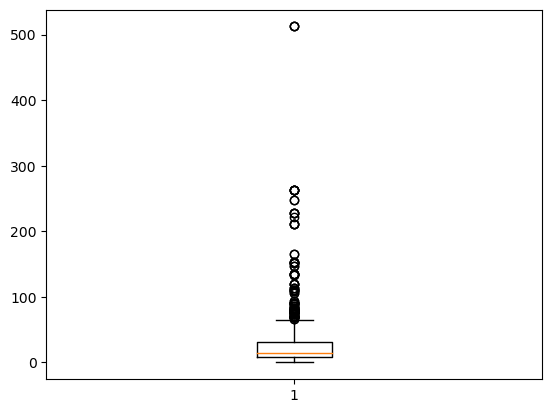

In [11]:
plt.boxplot(titanic['Fare'])

In [12]:
titanic[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Not all features are numeric:

In [13]:
# titanic=df.copy()

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic['Embarked'].map({"S":0, "C":1,"Q":2})

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

# 2. Process the Data
Categorical variables need to be transformed into numeric variables

### Transform the embarkment port

There are three ports: C = Cherbourg, Q = Queenstown, S = Southampton

In [20]:
pd.__version__

'1.5.3'

In [21]:
ports = pd.get_dummies(titanic['Embarked'] , prefix='Embarked')
ports.head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


Now the feature Embarked (a category) has been trasformed into 3 binary features, e.g. Embarked_C = 0 not embarked in Cherbourg, 1 = embarked in Cherbourg.  
Finally, the 3 new binary features substitute the original one in the data frame:

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic = titanic.join(ports)

In [24]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [25]:
titanic=titanic.drop(['Embarked'], axis=1)

In [26]:
# titanic.drop(['Embarked'], axis=1, inplace=True) # then drop the original column

In [27]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


### Transform the gender feature
This transformation is easier, being already a binary classification (male or female, this was 1912).
It doesn't need to create separate dummy categories, a mapping will be enough:

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [29]:
titanic['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [30]:
titanic.Sex = titanic.Sex.map({'male':0, 'female':1})


# df['Degree']=df['Degree'].map({'Graduation':0, 'PG':1, 'PhD':2})

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


## Extract the target variable
Create an X dataframe with the input features and an y series with the target (Survived)

In [32]:
# titanic['Survived Person']

In [33]:
# titanic.Survived Person

In [34]:
y = titanic['Survived'].values
# copy “y” column values out

In [35]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [36]:
titanic.drop(['Survived'], axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,0


In [37]:
X = titanic.drop(['Survived'], axis=1) # then, drop y column

In [38]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


### Drop not so important features
For the first model, we ignore some categorical features which will not add too much of a signal.

In [39]:
drop_lst=['Cabin','Ticket', 'Name','PassengerId']

In [40]:
X.drop(drop_lst, axis=1, inplace=True)

In [41]:
# X.drop(['Cabin'], axis=1, inplace=True) 

In [42]:
# X.drop(['Ticket'], axis=1, inplace=True) 

In [43]:
# X.drop(['Name'], axis=1, inplace=True) 
# X.drop(['PassengerId'], axis=1, inplace=True)

In [44]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


All features are now numeric, ready for regression.  
But we have still a couple of processing to do.

In [46]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


# Normalization

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
X2=X.copy()
X2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [49]:
X2=MinMaxScaler().fit_transform(X2)

In [50]:
X2

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        ,        nan, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 1.        ,
        0.        ]])

In [51]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [52]:
X[['Age', 'Fare']]=MinMaxScaler().fit_transform(X[['Age','Fare']])

In [53]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0.271174,1,0,0.014151,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,0
2,3,1,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,3,0,0.434531,0,0,0.015713,0,0,1


## Check if there are any missing values

In [54]:
X.isnull().values.any()


True

In [55]:
X.isna().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [56]:
#X[pd.isnull(X).any(axis=1)]  # check which rows have NaNs

True, there are missing values in the data (NaN) and a quick look at the data reveals that they are all in the Age feature.  
One possibility could be to remove the feature, another one is to fill the missing value with a fixed number or the average age.

In [57]:
X.Age.mean()

0.3679205534940792

In [58]:
X['Age'].fillna(X['Age'].mean(), inplace=True)



# X.Age.fillna(X.Age.mean(), inplace=True)  # replace NaN with average age

In [59]:
X.isnull().values.any()

False

In [60]:
X.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Now all missing values have been removed.  
The logistic regression would otherwise not work with missing values.

In [61]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0.271174,1,0,0.014151,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,0
2,3,1,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,3,0,0.434531,0,0,0.015713,0,0,1


In [62]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [233]:
features=['Pclass', ]

In [64]:
# Converting my data in numpy array

X=X.values

# y=y.values

In [65]:
X[:10]

array([[3.        , 0.        , 0.27117366, 1.        , 0.        ,
        0.01415106, 0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.4722292 , 1.        , 0.        ,
        0.13913574, 1.        , 0.        , 0.        ],
       [3.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.01546857, 0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.43453129, 1.        , 0.        ,
        0.1036443 , 0.        , 0.        , 1.        ],
       [3.        , 0.        , 0.43453129, 0.        , 0.        ,
        0.01571255, 0.        , 0.        , 1.        ],
       [3.        , 0.        , 0.36792055, 0.        , 0.        ,
        0.0165095 , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.67328474, 0.        , 0.        ,
        0.10122886, 0.        , 0.        , 1.        ],
       [3.        , 0.        , 0.01985423, 3.        , 1.        ,
        0.04113566, 0.        , 0.        , 1.        ],


In [66]:
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## Split the dataset into training and validation

The **training** set will be used to build the machine learning models. The model will be based on the features like passengers’ gender and class but also on the known survived flag.

The **validation** set should be used to see how well the model performs on unseen data. For each passenger in the test set, I use the model trained to predict whether or not they survived the sinking of the Titanic, then will be compared with the actual survival flag.

In [67]:
from sklearn.model_selection import train_test_split


# 70 % go into the training test, 30% in the validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

# 3. Modelling

##  Logistic Regression

Will use a simple logistic regression, that takes all the features in X and creates a regression line.
This is done using the LogisticRegression module in SciKitLearn.

In [70]:
from sklearn.linear_model import LogisticRegression


# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb

In [71]:
model_log = LogisticRegression(max_iter=500)

# model_dt=DecisionTreeClassifier()

# model_ran=RandomForestClassifier()

# model_gb=GradientBoostingClassifier()

# model_xgb=xgb.XGBClassifier()



In [72]:
model_log.fit(X_train, y_train) # training

# model_ran.fit(X_train, y_train)

# model_gb.fit(X_train, y_train)

# model_dt.fit(X_train, y_train)

# model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y_pred_log = model_log.predict(X_test)



# y_pred_ran=model_ran.predict(X_test)

# y_pred_gb=model_gb.predict(X_test)

# y_pred_dt=model_dt.predict(X_test)

# y_pred_xgb=model_xgb.predict(X_test)

In [74]:
from sklearn.metrics import  accuracy_score

In [75]:
accuracy_log = accuracy_score(y_test, y_pred_log) *100
accuracy_log

84.30493273542601

In [76]:
print('Logistic accuracy: ',accuracy_score(y_test, y_pred_log) *100 )
print('Decision Tree accuracy: ',accuracy_score(y_test, y_pred_dt) *100 )
print('Random Forest accuracy: ',accuracy_score(y_test, y_pred_ran) *100 )
print('Gradient Boosting accuracy: ',accuracy_score(y_test, y_pred_gb) *100 )
print('XGBoost accuracy: ',accuracy_score(y_test, y_pred_xgb) *100 )

Logistic accuracy:  84.30493273542601
Decision Tree accuracy:  79.82062780269058
Random Forest accuracy:  85.65022421524664
Gradient Boosting accuracy:  87.4439461883408
XGBoost accuracy:  82.51121076233184


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#survived: 1
#not survived: 0

In [78]:
matrix = classification_report(y_test,y_pred_log,labels=[1,0])

print('Classification report : Logistic \n',matrix)

Classification report : Logistic 
               precision    recall  f1-score   support

           1       0.82      0.76      0.79        87
           0       0.85      0.90      0.87       136

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [79]:
matrix = classification_report(y_test,y_pred_dt,labels=[1,0])

print('Classification report : Decision Tree\n',matrix)

Classification report : Decision Tree
               precision    recall  f1-score   support

           1       0.74      0.75      0.74        87
           0       0.84      0.83      0.83       136

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [80]:
matrix = classification_report(y_test,y_pred_ran,labels=[1,0])
print('Classification report : Random Forest\n',matrix)

Classification report : Random Forest
               precision    recall  f1-score   support

           1       0.84      0.78      0.81        87
           0       0.87      0.90      0.88       136

    accuracy                           0.86       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



In [81]:
matrix = classification_report(y_test,y_pred_gb,labels=[1,0])
print('Classification report : Gradient boosting \n',matrix)

Classification report : Gradient boosting 
               precision    recall  f1-score   support

           1       0.90      0.76      0.82        87
           0       0.86      0.95      0.90       136

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.88      0.87      0.87       223



In [82]:
matrix = classification_report(y_test,y_pred_xgb,labels=[1,0])
print('Classification report : XGboost\n',matrix)

Classification report : XGboost
               precision    recall  f1-score   support

           1       0.79      0.76      0.77        87
           0       0.85      0.87      0.86       136

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.83      0.82       223



In [72]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
342/ (549 + 342)

0.3838383838383838

In [71]:
accuracy_log

82.08955223880598

In [ ]:
str(round(accuracy_log, 1))

In [ ]:
str(accuracy_log )

In [ ]:
print('Accuracy of logistic model is equal ' + str(round(accuracy_log, 1)) + ' %.')

In [ ]:
y_test.shape

In [ ]:
y_pred_log.shape

In [ ]:
titanic.Survived.value_counts()

In [ ]:
342/(342+549)

# 4. Evaluate the model

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [77]:
accuracy_log = accuracy_score(y_test, y_pred_log)*100
print('Accuracy of logistic model is equal ' + str(round(accuracy_log, 1)) + ' %.')

# accuracy_ran = accuracy_score(y_train, y_pred_ran)*100
# print('Accuracy of Randomforest model is equal ' + str(round(accuracy_ran, 1)) + ' %.')

# accuracy_gb = accuracy_score(y_train, y_pred_gb)*100
# print('Accuracy of Gradient Boosting model is equal ' + str(round(accuracy_gb, 1)) + ' %.')

Accuracy of logistic model is equal 82.1 %.


In [ ]:
'''
Survived :  1
Not Survived: 0 
'''

In [79]:
X_test.shape

(268, 9)

In [78]:
matrix = confusion_matrix(y_test,y_pred_log, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 76  29]
 [ 19 144]]


In [95]:
matrix = classification_report(y_test,y_pred_gb,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.72      0.78       105
           0       0.84      0.92      0.88       163

    accuracy                           0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



In [96]:
matrix = classification_report(y_test,y_pred_log,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.72      0.76       105
           0       0.83      0.88      0.86       163

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
'''
TP: 45
FP: 6
FN: 19
TN : 109

P=TP/(TP+FP)=0.88

R=TP/(TP+FN)=0.70
'''

In [ ]:
cancer:1
no cancer: 0
    
cancer: 0
no cancer: 1

In [ ]:
matrix = classification_report(y_test,y_pred_log,labels=[1,0])
print('Classification report : \n',matrix)

In [ ]:
survived: True 1
not survived : False 0

In [ ]:
survived: False 0
not survived: True 1

In [ ]:
# confusion matrix in sklearn


In [ ]:
# actual values
actual =    [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

In [ ]:
'''
TP:2
FP:1
TN:5
FN:2

'''

In [ ]:
'''

Confusion matrix
Recall
Precision
Accuracy score
F1 score



'''

In [ ]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

In [ ]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

In [ ]:
cancer :  1
    
no cancer:  0
    
    

In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

In [ ]:
actual =    [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

'''
cancer data
1: Cancer
0: Healthy

Recall


Spam detetction:

1: Spam
0: Not spam

Precision

'''